<a href="https://colab.research.google.com/github/Zeinayyy/Sunspot-Prediction/blob/main/sunspot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Conv1D,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.utils import plot_model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dt = pd.read_csv("/content/drive/MyDrive/nyobaan/Sunspots.csv")

In [4]:
dt=dt.set_index("Date")

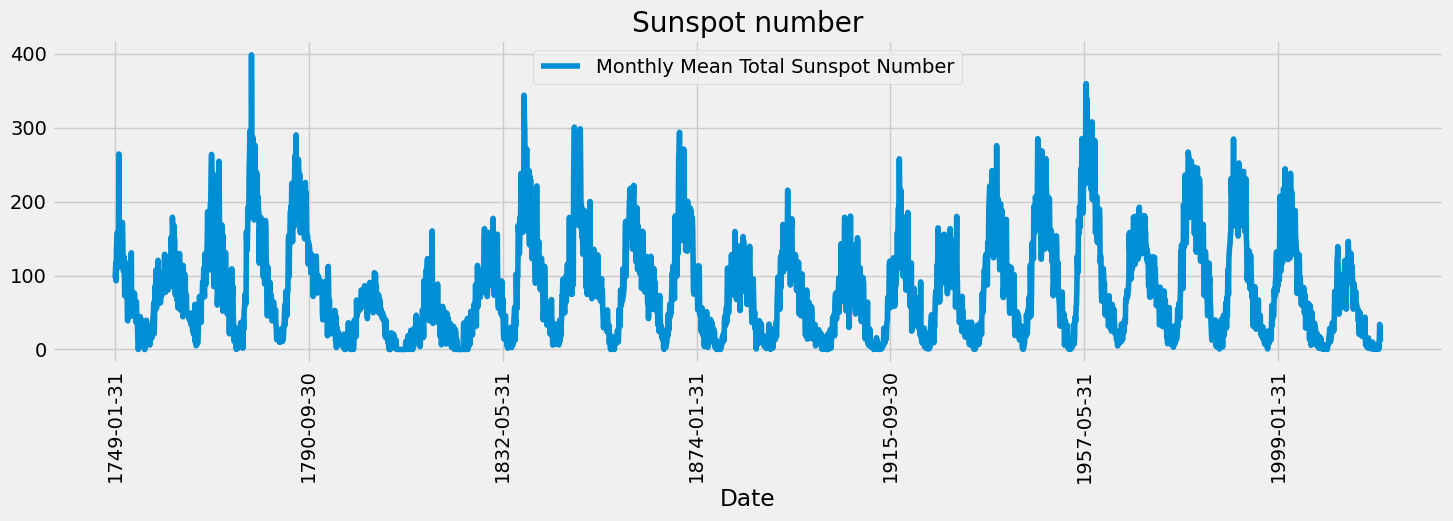

In [5]:
dt["Monthly Mean Total Sunspot Number"].plot(figsize=(16,4),legend=True)
plt.xticks(rotation=90)
plt.title('Sunspot number')
plt.show()

In [6]:
Train_data=dt[:'2011']["Monthly Mean Total Sunspot Number"].values
Test_data=dt['2011':]["Monthly Mean Total Sunspot Number"].values

In [7]:
M=MinMaxScaler()
Scaled_train=M.fit_transform(Train_data.reshape(-1,1))
Scaled_test=M.transform(Test_data.reshape(-1,1))

In [8]:


Window=64
def windowed_dataset(series, window_size=Window, batch_size=32, shuffle_buffer=1000):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds



In [9]:

Train=windowed_dataset(Scaled_train)

In [10]:
Model=Sequential(
[
    Conv1D(filters=64,kernel_size=3,strides=1,padding='causal',input_shape=(64,1),activation='relu'),
    Bidirectional(LSTM(units=64,return_sequences=True)),
    tf.keras.layers.LSTM(32, return_sequences=True),
        tf.keras.layers.LSTM(20),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1,activation="relu"),
])


In [11]:
for X, y in Train.take(1):
    y_pred=Model.predict(X)
    print(y_pred.shape)
    print(y.shape)

1/1 [==============================] - 2s 2s/step
(32, 1)
(32, 1)


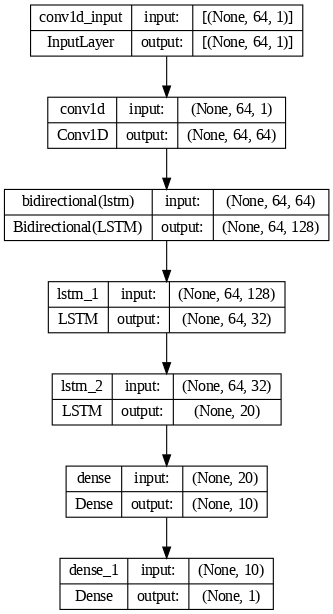

In [12]:
plot_model(Model, show_shapes = True,expand_nested = True,dpi = 80)


In [13]:
lr_schedule=keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))
Model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=keras.optimizers.SGD(momentum=0.9),
                  metrics=["mae"])
history = Model.fit(Train, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
97/97 [==============================] - 24s 158ms/step - loss: 0.0331 - mae: 0.1938 - lr: 1.0000e-04
Epoch 2/100
97/97 [==============================] - 18s 185ms/step - loss: 0.0276 - mae: 0.1712 - lr: 1.1220e-04
Epoch 3/100
97/97 [==============================] - 14s 137ms/step - loss: 0.0234 - mae: 0.1555 - lr: 1.2589e-04
Epoch 4/100
97/97 [==============================] - 15s 156ms/step - loss: 0.0201 - mae: 0.1447 - lr: 1.4125e-04
Epoch 5/100
97/97 [==============================] - 15s 158ms/step - loss: 0.0177 - mae: 0.1373 - lr: 1.5849e-04
Epoch 6/100
97/97 [==============================] - 16s 156ms/step - loss: 0.0160 - mae: 0.1330 - lr: 1.7783e-04
Epoch 7/100
97/97 [==============================] - 14s 139ms/step - loss: 0.0148 - mae: 0.1307 - lr: 1.9953e-04
Epoch 8/100
97/97 [==============================] - 15s 152ms/step - loss: 0.0141 - mae: 0.1297 - lr: 2.2387e-04
Epoch 9/100
97/97 [==============================] - 15s 153ms/step - loss: 0.0136 - mae

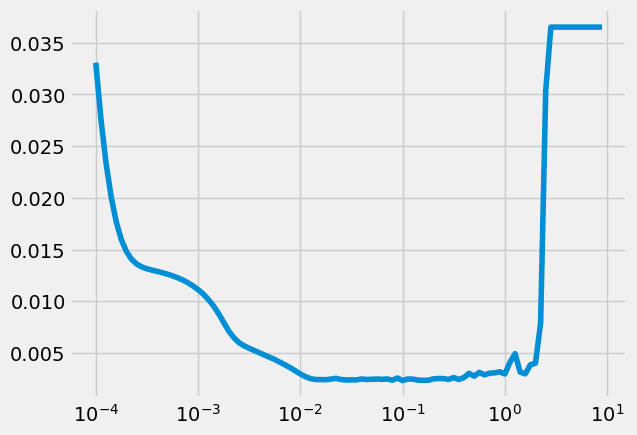

In [14]:


plt.semilogx(history.history["lr"], history.history["loss"])
plt.show()



In [15]:
Model=Sequential(
[
    Conv1D(filters=64,kernel_size=3,strides=1,padding='causal',input_shape=(64,1),activation='relu'),
    Bidirectional(LSTM(units=64,return_sequences=True)),
    tf.keras.layers.LSTM(32, return_sequences=True),
        tf.keras.layers.LSTM(20),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1,activation="relu"),
])
Model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=keras.optimizers.SGD(momentum=0.9,learning_rate=1e-2),
                  metrics=["mae"])
history2 = Model.fit(Train, epochs=40)

Epoch 1/40
97/97 [==============================] - 24s 160ms/step - loss: 0.0131 - mae: 0.1304
Epoch 2/40
97/97 [==============================] - 15s 149ms/step - loss: 0.0073 - mae: 0.0944
Epoch 3/40
97/97 [==============================] - 14s 147ms/step - loss: 0.0053 - mae: 0.0780
Epoch 4/40
97/97 [==============================] - 15s 155ms/step - loss: 0.0047 - mae: 0.0729
Epoch 5/40
97/97 [==============================] - 19s 192ms/step - loss: 0.0043 - mae: 0.0694
Epoch 6/40
97/97 [==============================] - 16s 159ms/step - loss: 0.0039 - mae: 0.0658
Epoch 7/40
97/97 [==============================] - 16s 159ms/step - loss: 0.0036 - mae: 0.0623
Epoch 8/40
97/97 [==============================] - 14s 138ms/step - loss: 0.0033 - mae: 0.0596
Epoch 9/40
97/97 [==============================] - 15s 158ms/step - loss: 0.0030 - mae: 0.0575
Epoch 10/40
97/97 [==============================] - 15s 156ms/step - loss: 0.0029 - mae: 0.0559
Epoch 11/40
97/97 [====================

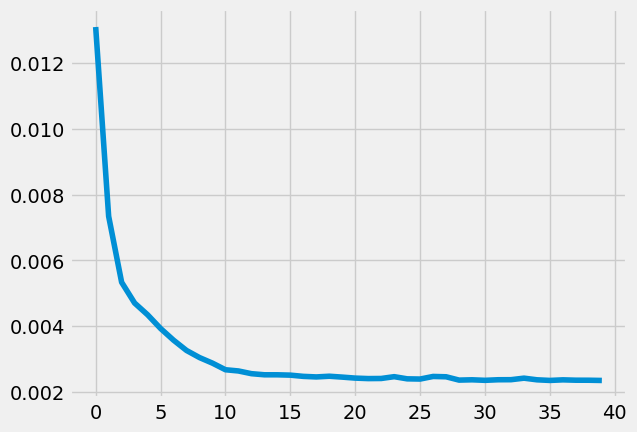

In [16]:
plt.plot(history2.history["loss"])
plt.show()

In [17]:


history3 = Model.fit(Train, epochs=40)



Epoch 1/40
97/97 [==============================] - 15s 158ms/step - loss: 0.0024 - mae: 0.0501
Epoch 2/40
97/97 [==============================] - 16s 159ms/step - loss: 0.0023 - mae: 0.0501
Epoch 3/40
97/97 [==============================] - 15s 158ms/step - loss: 0.0023 - mae: 0.0496
Epoch 4/40
97/97 [==============================] - 14s 142ms/step - loss: 0.0023 - mae: 0.0495
Epoch 5/40
97/97 [==============================] - 15s 158ms/step - loss: 0.0023 - mae: 0.0498
Epoch 6/40
97/97 [==============================] - 14s 139ms/step - loss: 0.0023 - mae: 0.0498
Epoch 7/40
97/97 [==============================] - 15s 153ms/step - loss: 0.0023 - mae: 0.0495
Epoch 8/40
97/97 [==============================] - 16s 160ms/step - loss: 0.0023 - mae: 0.0497
Epoch 9/40
97/97 [==============================] - 15s 156ms/step - loss: 0.0023 - mae: 0.0495
Epoch 10/40
97/97 [==============================] - 13s 134ms/step - loss: 0.0024 - mae: 0.0504
Epoch 11/40
97/97 [====================

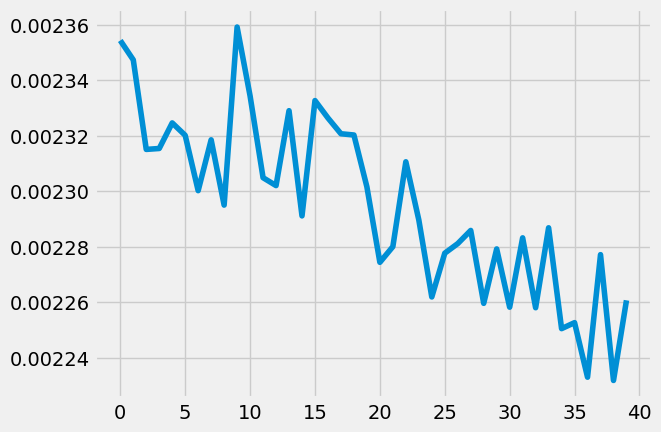

In [18]:


plt.plot(history3.history["loss"])
plt.show()



In [19]:


Test_to_predict=np.concatenate([Scaled_train[-64:],Scaled_test],axis=0)
def window_test(series,window_size=64):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size+1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size+1))
    ds = ds.map(lambda window: (window[:-1], window[-1]))
    ds = ds.batch(len(series)).prefetch(1)
    return ds



In [20]:
Test_to_predict=window_test(Test_to_predict)

In [21]:


Scaled_train[-64:]



array([[0.09342039],
       [0.03314917],
       [0.06906077],
       [0.14892014],
       [0.05248619],
       [0.01431441],
       [0.0434455 ],
       [0.12631843],
       [0.09342039],
       [0.06152687],
       [0.05575088],
       [0.05223506],
       [0.05951783],
       [0.03741838],
       [0.08965344],
       [0.05600201],
       [0.07358112],
       [0.04620794],
       [0.01808137],
       [0.01356102],
       [0.04897037],
       [0.05349071],
       [0.03792064],
       [0.02461075],
       [0.0100452 ],
       [0.00376695],
       [0.00703164],
       [0.0434455 ],
       [0.01029633],
       [0.00728277],
       [0.03892516],
       [0.00904068],
       [0.01155198],
       [0.01305876],
       [0.00150678],
       [0.00075339],
       [0.00301356],
       [0.01054746],
       [0.01657459],
       [0.0025113 ],
       [0.00326469],
       [0.00301356],
       [0.00150678],
       [0.00301356],
       [0.00728277],
       [0.0158212 ],
       [0.01381215],
       [0.   

In [22]:


Scaled_test



array([[0.06855851],
       [0.12129583],
       [0.19738825],
       [0.19110999],
       [0.14615771],
       [0.14088398],
       [0.16197891],
       [0.1652436 ],
       [0.30160723],
       [0.31567052],
       [0.34932195],
       [0.27448518],
       [0.2370668 ],
       [0.12004018],
       [0.21747865],
       [0.21572074],
       [0.24234053],
       [0.23103968],
       [0.25138122],
       [0.23807132],
       [0.23530889],
       [0.19211452],
       [0.21998995],
       [0.14264189],
       [0.24133601],
       [0.15293822],
       [0.19663486],
       [0.26946258],
       [0.30185836],
       [0.19261678],
       [0.21647413],
       [0.23053742],
       [0.1368659 ],
       [0.28729282],
       [0.28603717],
       [0.31190357],
       [0.2938222 ],
       [0.36690105],
       [0.32320442],
       [0.28252135],
       [0.28252135],
       [0.25841286],
       [0.25163235],
       [0.26845806],
       [0.32646911],
       [0.22601708],
       [0.26017077],
       [0.283

In [23]:


list(Test_to_predict)



[(<tf.Tensor: shape=(121, 64, 1), dtype=float64, numpy=
  array([[[0.09342039],
          [0.03314917],
          [0.06906077],
          ...,
          [0.08437971],
          [0.08638875],
          [0.06152687]],
  
         [[0.03314917],
          [0.06906077],
          [0.14892014],
          ...,
          [0.08638875],
          [0.06152687],
          [0.06855851]],
  
         [[0.06906077],
          [0.14892014],
          [0.05248619],
          ...,
          [0.06152687],
          [0.06855851],
          [0.12129583]],
  
         ...,
  
         [[0.1652436 ],
          [0.16172777],
          [0.19738825],
          ...,
          [0.01883476],
          [0.00150678],
          [0.03616273]],
  
         [[0.16172777],
          [0.19738825],
          [0.15971873],
          ...,
          [0.00150678],
          [0.03616273],
          [0.08538423]],
  
         [[0.19738825],
          [0.15971873],
          [0.15620291],
          ...,
          [0.03616273],
 

In [24]:


Prediction=Model.predict(Test_to_predict)



1/1 [==============================] - 2s 2s/step


In [25]:


mean_absolute_error(M.inverse_transform(Scaled_test),M.inverse_transform(Prediction))



15.941956679289007

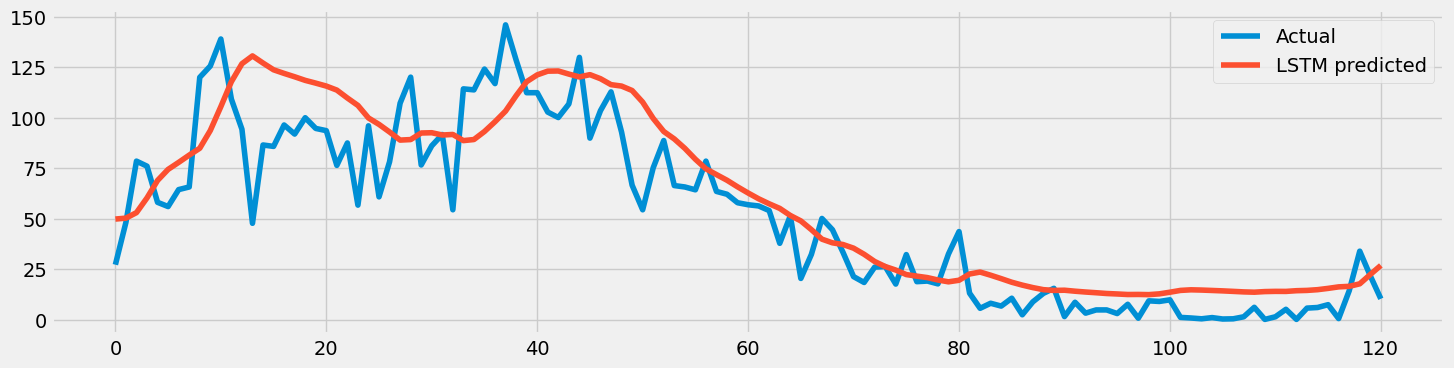

In [26]:


x=np.arange(len(Scaled_test))
plt.figure(figsize=(16,4))
plt.plot(x,M.inverse_transform(Scaled_test),label='Actual')
plt.plot(x,M.inverse_transform(Prediction),label='LSTM predicted')
plt.legend()
plt.show()



In [27]:

Prediction_train=Model.predict(window_test(Scaled_train))

1/1 [==============================] - 3s 3s/step


In [28]:
Prediction_train.shape


(3080, 1)

In [29]:


mean_absolute_error(M.inverse_transform(Scaled_train[64:]),M.inverse_transform(Prediction_train))



19.842515103538314

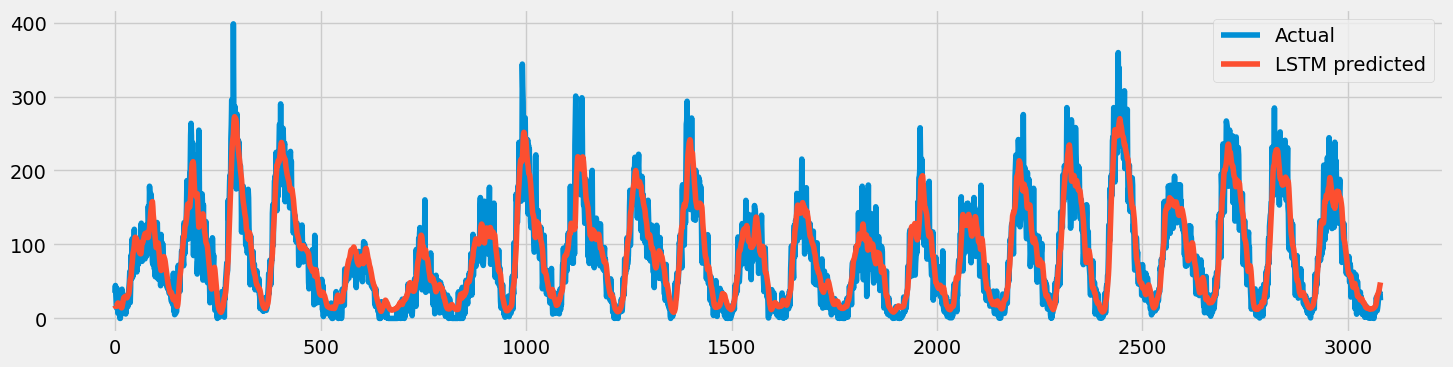

In [30]:
x=np.arange(len(Scaled_train[64:]))
plt.figure(figsize=(16,4))
plt.plot(x,M.inverse_transform(Scaled_train[64:]),label='Actual')
plt.plot(x,M.inverse_transform(Prediction_train),label='LSTM predicted')
plt.legend()
plt.show()
